In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#1. Data Exploration and Understanding
data=pd.read_csv("/content/laptop.csv")
data.head()

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [ ]:
data.columns #list of column names

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Company', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price'],
      dtype='object')

In [ ]:
# changing column names for 'Unnamed: 0.1', 'Unnamed: 0' for better underastanding
data.rename(columns={'Unnamed: 0.1':'Sno','Unnamed: 0':'ID'},inplace=True)


In [ ]:
data.shape #shape of dataset

(1303, 13)

In [ ]:
data.columns  #column names  in the dataset

Index(['Sno', 'ID', 'Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu',
       'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [ ]:
data.dtypes # columns along with datatypes

Sno                   int64
ID                  float64
Company              object
TypeName             object
Inches               object
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price               float64
dtype: object

In [ ]:
#checking for missing values
missing_values=data.isnull().sum()
total_missing_values=data.isnull().sum().sum()
print(f"Missing values in each column:\n {missing_values}")
print(f"Total no. of Missing values over all columns:\n {total_missing_values}")

Missing values in each column:
 Sno                  0
ID                  30
Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64
Total no. of Missing values over all columns:
 360


In [ ]:
#drop the missing values
data.dropna(inplace=True)

In [ ]:
data.shape

(1273, 13)

In [ ]:
data.isnull().sum() #checking the null values availble or not  after dropping all null values

Sno                 0
ID                  0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

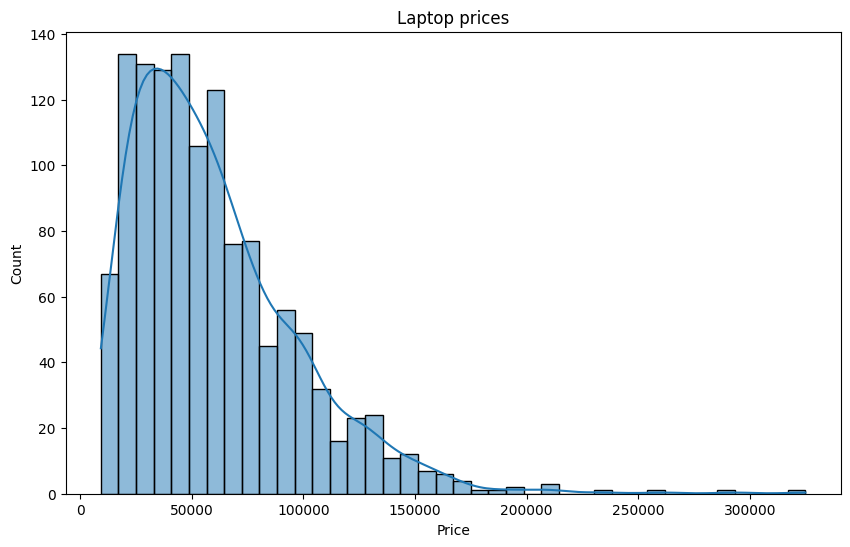

In [ ]:
#Vidualization--checking the laptop prices acording to the frequency
plt.figure(figsize=(10,6))
sns.histplot(data['Price'],bins=40,kde=True)
plt.title("Laptop prices")
plt.show()

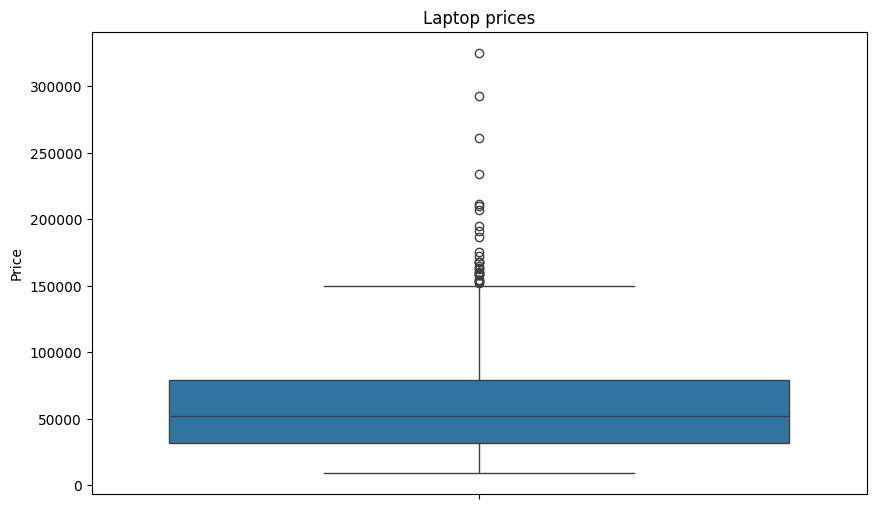

In [ ]:
#Vidualization--checking the laptop prices acording to the frequency to identify outliers
plt.figure(figsize=(10,6))
sns.boxplot(data['Price'])
plt.title("Laptop prices")

plt.show()

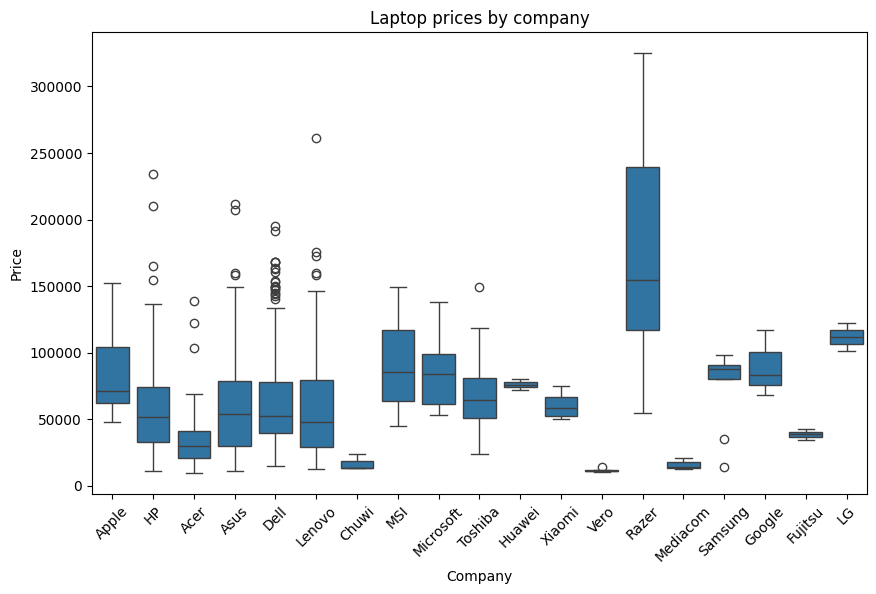

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=data['Company'],y=data['Price'])
plt.title("Laptop prices by company")
plt.xticks(rotation=45)
plt.show()

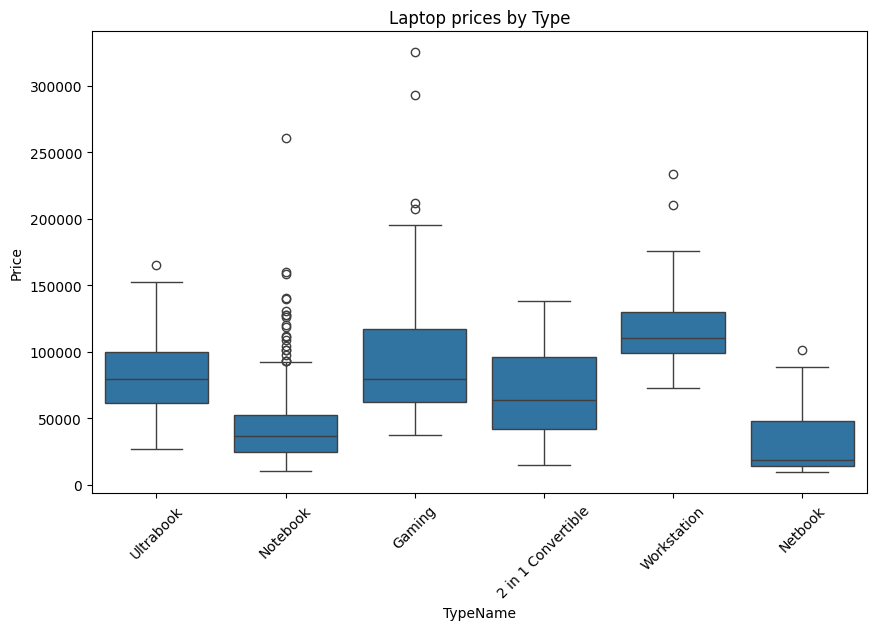

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=data['TypeName'],y=data['Price'])
plt.title("Laptop prices by Type")
plt.xticks(rotation=45)
plt.show()

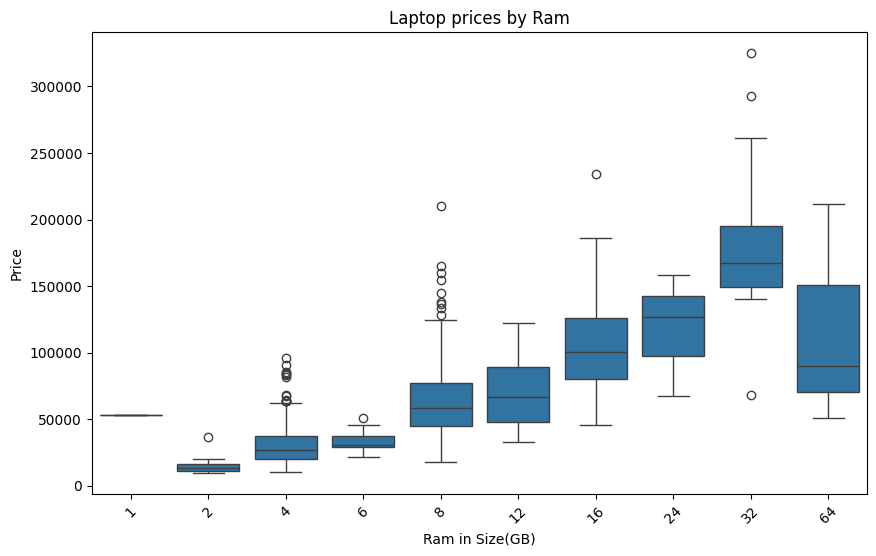

In [ ]:
data['Ram']=data['Ram'].str.replace("GB","").astype(int) #cleaning ram as it has str as gb, we need to replace gb with space
plt.figure(figsize=(10,6))
sns.boxplot(x=data['Ram'],y=data['Price'])
plt.title("Laptop prices by Ram")
plt.xlabel("Ram in Size(GB)")
plt.xticks(rotation=45)
plt.show()

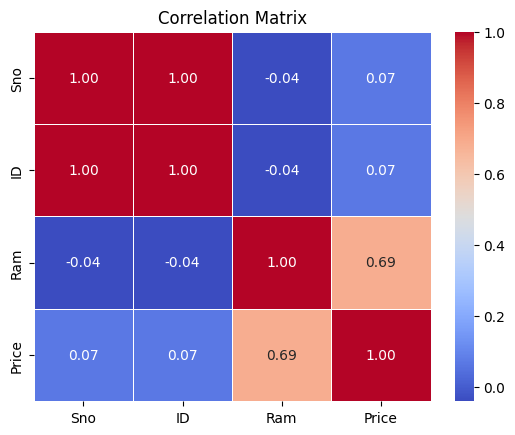

In [ ]:
# Correlation analysis for numeric columns
numeric_columns=data.select_dtypes(include=[float,int]).columns
corr_matrix = data[numeric_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

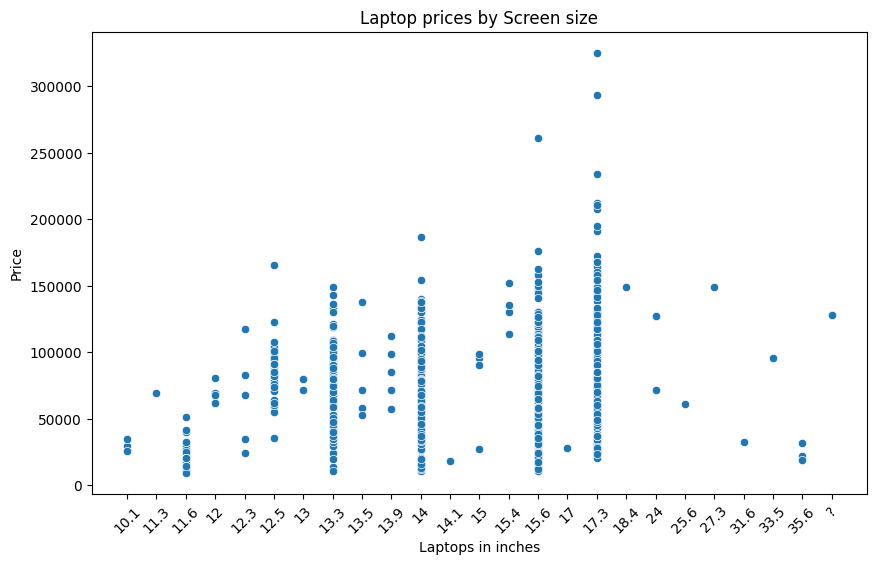

In [ ]:
plt.figure(figsize=(10,6))
sorted_data=data.sort_values(by='Inches')
sns.scatterplot(x=sorted_data['Inches'],y=sorted_data['Price'])
plt.title("Laptop prices by Screen size")
plt.xlabel("Laptops in inches")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#2. Data Preprocessing
#1.	Handle Missing Values:
print(f"Missing values:\n {data.isnull().sum()}")

Missing values:
 Sno                 0
ID                  0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64


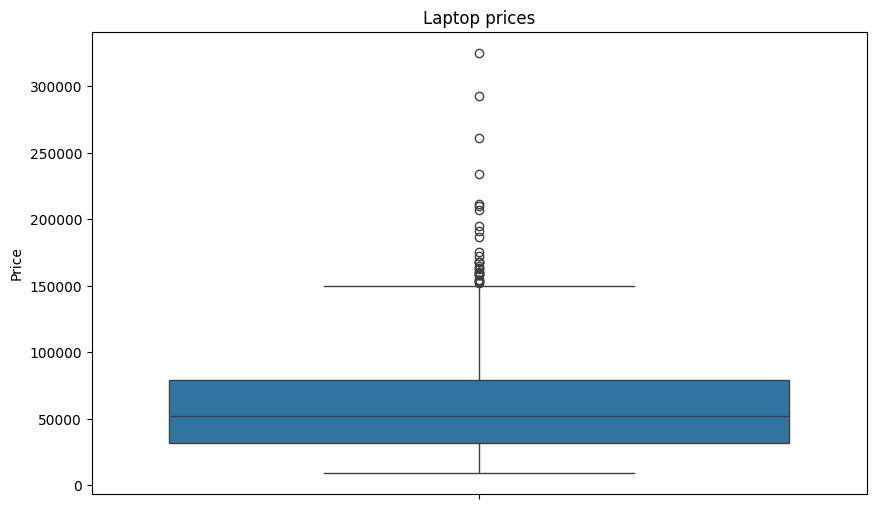

In [ ]:
#2.	Outlier Detection and Treatment:
#Vidualization--checking the laptop prices acording to the frequency to identify outliers
plt.figure(figsize=(10,6))
sns.boxplot(data['Price'])
plt.title("Laptop prices")

plt.show()

In [ ]:
#removing outliers by using a remove_outlier function
def outliers(df,column):
    q1=data[column].quantile(0.25)
    q3=data[column].quantile(0.75)
    IQR=q3-q1
    lower_limit=q1-1.5*IQR
    upper_limit=q1+1.5*IQR
    return df[(df[column]>=lower_limit) & (df[column]<=upper_limit)]


In [ ]:
#remove outliers from price column
data=outliers(data,'Price')
print(f"shape of the data after removing outliers in dataset \n {data.shape}")

shape of the data after removing outliers in dataset 
 (1120, 13)


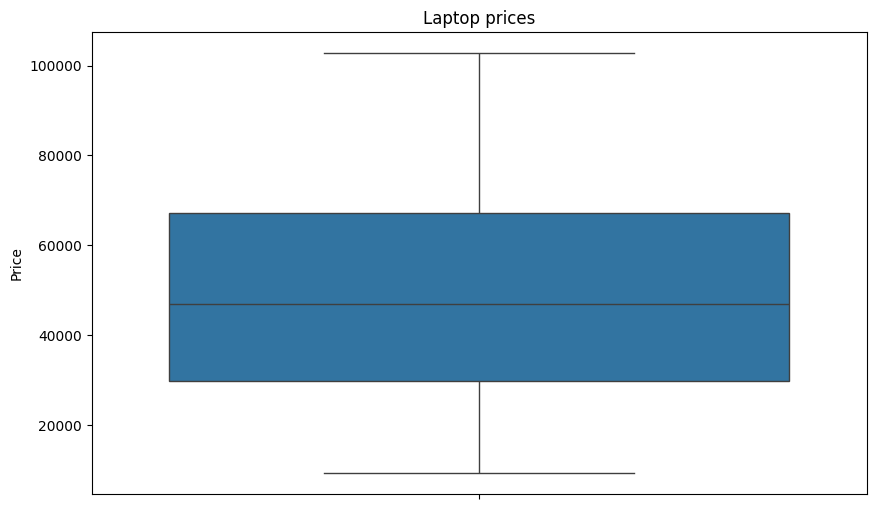

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data['Price'])
plt.title("Laptop prices")

plt.show()

In [ ]:
#3.	Categorical Encoding:
#displaying categorical columns
categorical_columns=data.select_dtypes(include=['object']).columns
print(f"categorical_columns:\n {categorical_columns}")
# Encode categorical variables by using one-hot encoding

data_encoded = pd.get_dummies(data,columns=categorical_columns, drop_first=True)

categorical_columns:
 Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Memory',
       'Gpu', 'OpSys', 'Weight'],
      dtype='object')


In [ ]:
#Feature Engineering---Extract additional information
#extracting screen resulution
data['Screenwidth']=data['ScreenResolution'].str.extract(r'(\d+)x')[0].astype(int)
data['Screenheight']=data['ScreenResolution'].str.extract(r'x(\d+)')[0].astype(int)
print(data[['ScreenResolution', 'Screenwidth' ,  'Screenheight']].head())

                     ScreenResolution  Screenwidth  Screenheight
0  IPS Panel Retina Display 2560x1600         2560          1600
1                            1440x900         1440           900
2                   Full HD 1920x1080         1920          1080
4  IPS Panel Retina Display 2560x1600         2560          1600
5                            1366x768         1366           768


In [ ]:
data['CpuBrand']=data['Cpu'].str.split().str[0]       #extracting cpu brand
print(data['CpuBrand'].unique())

['Intel' 'AMD' 'Samsung']


In [ ]:
data.head()

,Sno,ID,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Screenwidth,Screenheight,CpuBrand
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,2560,1600,Intel
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,1440,900,Intel
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,1920,1080,Intel
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,2560,1600,Intel
5,5,5.0,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,21312.0000,1366,768,AMD


In [ ]:
data['Inches']=data['Inches'].astype(float)
data.dtypes

Sno                   int64
ID                  float64
Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                   int64
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price               float64
Screenwidth           int64
Screenheight          int64
CpuBrand             object
dtype: object

In [ ]:
#calculate pixels per inch
data['PPI']=np.sqrt(data['Screenwidth']**2+data['Screenheight']**2)/data['Inches']
data[['ScreenResolution','Screenwidth','Screenheight','PPI']].head()

,ScreenResolution,Screenwidth,Screenheight,PPI
0,IPS Panel Retina Display 2560x1600,2560,1600,226.983005
1,1440x900,1440,900,127.677940
2,Full HD 1920x1080,1920,1080,141.211998
4,IPS Panel Retina Display 2560x1600,2560,1600,226.983005
5,1366x768,1366,768,100.454670


In [ ]:
#	Categorical Encoding:
#displaying categorical columns
categorical_columns=data.select_dtypes(include=['object']).columns
print(f"categorical_columns:\n {categorical_columns}")
# Encode categorical variables by using one-hot encoding
data_encoded = pd.get_dummies(data,columns=categorical_columns, drop_first=True)
data_encoded.head()

categorical_columns:
 Index(['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Memory', 'Gpu',
       'OpSys', 'Weight', 'CpuBrand'],
      dtype='object')


,Sno,ID,Inches,Ram,Price,Screenwidth,Screenheight,PPI,Company_Apple,Company_Asus,...,Weight_4kg,Weight_5.4kg,Weight_5.8kg,Weight_6.2kg,Weight_7.2kg,Weight_8.23kg,Weight_8.4kg,Weight_?,CpuBrand_Intel,CpuBrand_Samsung
0,0,0.0,13.3,8,71378.6832,2560,1600,226.983005,True,False,...,False,False,False,False,False,False,False,False,True,False
1,1,1.0,13.3,8,47895.5232,1440,900,127.677940,True,False,...,False,False,False,False,False,False,False,False,True,False
2,2,2.0,15.6,8,30636.0000,1920,1080,141.211998,False,False,...,False,False,False,False,False,False,False,False,True,False
4,4,4.0,13.3,8,96095.8080,2560,1600,226.983005,True,False,...,False,False,False,False,False,False,False,False,True,False
5,5,5.0,15.6,4,21312.0000,1366,768,100.454670,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
#Model Development
#import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
#split the data into training and testing data
X = data_encoded.drop(columns=['Price'])
y = data_encoded['Price']
#display shape of x and y
print(f"shape of feature variable {X.shape}")
print(f"shape of target variable {y.shape}")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Model training and evaluation
def models_3(model,X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    MAE=mean_absolute_error(y_test, y_pred)
    MSE=mean_squared_error(y_test, y_pred)
    R2=r2_score(y_test, y_pred)
    print(f"Mean Absolute error:{MAE:.2f}")
    print(f"Mean Squared error:{MSE:.2f}")
    print(f"R2 Score:{R2:.2f}")
    return MAE,MSE,R2
#Linear Regression
lr=LinearRegression()
print("\nLinear Regression:")
models_3(lr,X_train, X_test, y_train, y_test)
rf=RandomForestRegressor()
print("\nRandom Forest Regressor:")
models_3(rf,X_train, X_test, y_train, y_test)
gb=GradientBoostingRegressor()
print("\nGradient Boosting Regressor:")
models_3(gb,X_train, X_test, y_train, y_test)

shape of feature variable (1120, 470)
shape of target variable (1120,)

Linear Regression:
Mean Absolute error:8776.23
Mean Squared error:162804248.00
R2 Score:0.73

Random Forest Regressor:
Mean Absolute error:8161.62
Mean Squared error:126012149.07
R2 Score:0.79

Gradient Boosting Regressor:
Mean Absolute error:8397.08
Mean Squared error:120095696.11
R2 Score:0.80


(8397.077088747697, 120095696.10965209, 0.8022037000889892)

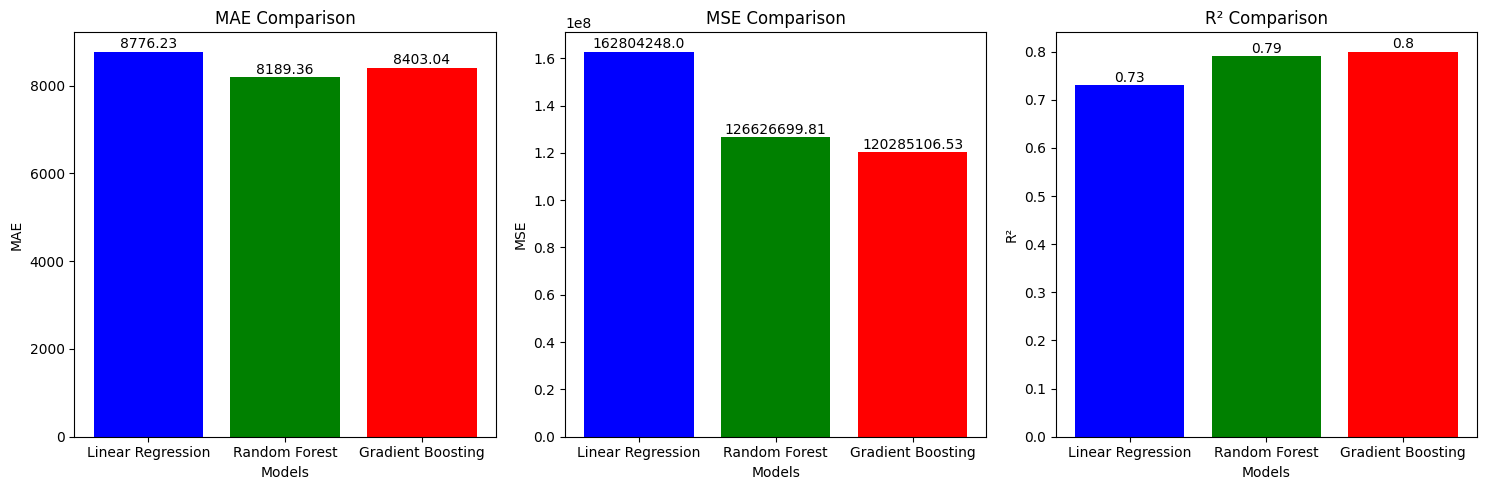

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data - replace these with your actual model performance metrics
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting']
mae_score = [8776.23, 8189.36, 8403.04]
mse_scores = [162804248.00, 126626699.81, 120285106.53]  # actual MSE values
r2_scores = [0.73, 0.79, 0.80]  # actual R² values

# Create a figure
plt.figure(figsize=(15, 5))

# Bar chart for MAE
plt.subplot(1, 3, 1)
bars = plt.bar(models, mae_score, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('MAE')
plt.title('MAE Comparison')

# Adding the data labels for MAE
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + (yval * 0.01), round(yval, 2), ha='center', color='black', fontsize=10)

# Bar chart for MSE
plt.subplot(1, 3, 2)
bars = plt.bar(models, mse_scores, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('MSE')
plt.title('MSE Comparison')

# Adding the data labels for MSE
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + (yval * 0.01), round(yval, 2), ha='center', color='black', fontsize=10)

# Bar chart for R²
plt.subplot(1, 3, 3)
bars = plt.bar(models, r2_scores, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('R²')
plt.title('R² Comparison')

# Adding the data labels for R²
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + (yval * 0.01), round(yval, 2), ha='center', color='black', fontsize=10)

plt.tight_layout()
plt.show()


In [ ]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

# Define the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Perform Grid Search with Cross-Validation
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=2, n_jobs=-1, verbose=3)
grid_search_rf.fit(X_train, y_train)


grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid_gb, cv=2, n_jobs=-1, verbose=3)
grid_search_gb.fit(X_train, y_train)

# Retrieve the best model
best_rf = grid_search_rf.best_estimator_
best_gb = grid_search_gb.best_estimator_

# Define the function to evaluate the model
def models_3(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    print(f"Model: {type(model).__name__} - MAE: {mae},RMSE: {rmse}, R²: {r2}")
    return mae,rmse,r2

# Evaluate the best model
models_3(best_rf, X_train, X_test, y_train, y_test)
models_3(best_gb, X_train, X_test, y_train, y_test)

Fitting 2 folds for each of 16 candidates, totalling 32 fits
Fitting 2 folds for each of 162 candidates, totalling 324 fits
Model: RandomForestRegressor - MAE: 8127.676735071431,RMSE: 11128.24805318841, R²: 0.7960403233550291
Model: GradientBoostingRegressor - MAE: 7883.030528092958,RMSE: 10259.928836269353, R²: 0.826627817498377


(7883.030528092958, 10259.928836269353, 0.826627817498377)

In [ ]:
#Sample Data Preparation--hyper meter tuning
#First, prepare the sample data to represent the performance of models before and after tuning
import pandas as pd

# Sample data - replace these with your actual performance metrics
data = {
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting'],
    'MAE_Before_Tuning': [8776.23, 8143.47, 8376.38],
    'MAE_After_Tuning': [0, 8127.676735071431, 7883.030528092958],
    'RMSE_Before_Tuning': [162804248.00, 125480808.74, 120069799.67],
    'RMSE_After_Tuning': [0, 11128.24805318841, 10259.928836269353],
    'R2_Before_Tuning': [0.73, 0.79, 0.80],
    'R2_After_Tuning': [0, 0.7960403233550291, 0.826627817498377]
}
df = pd.DataFrame(data)
print(df)

               Model  MAE_Before_Tuning  MAE_After_Tuning  RMSE_Before_Tuning  \
0  Linear Regression            8776.23          0.000000        1.628042e+08   
1      Random Forest            8143.47       8127.676735        1.254808e+08   
2  Gradient Boosting            8376.38       7883.030528        1.200698e+08   

   RMSE_After_Tuning  R2_Before_Tuning  R2_After_Tuning  
0           0.000000              0.73         0.000000  
1       11128.248053              0.79         0.796040  
2       10259.928836              0.80         0.826628  


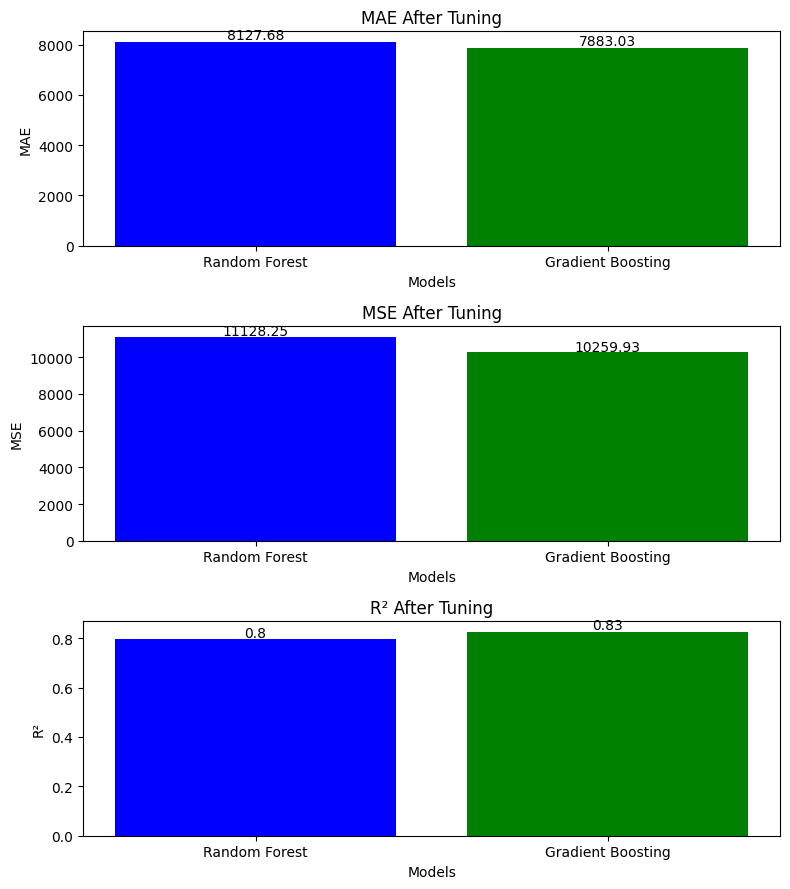

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Sample data - replace these with your actual performance metrics after tuning
data = {
    'Model': ['Random Forest', 'Gradient Boosting'],
    'MAE_After_Tuning': [8127.676735071431, 7883.030528092958],
    'MSE_After_Tuning': [11128.24805318841, 10259.928836269353],
    'R2_After_Tuning': [0.7960403233550291, 0.826627817498377]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Plotting the data
fig, axes = plt.subplots(3, 1, figsize=(8, 9))

# MAE Comparison
axes[0].bar(df['Model'], df['MAE_After_Tuning'], color=['blue', 'green'])
axes[0].set_xlabel('Models')
axes[0].set_ylabel('MAE')
axes[0].set_title('MAE After Tuning')

# Adding the data labels
for i in range(len(df['MAE_After_Tuning'])):
    axes[0].text(i, df['MAE_After_Tuning'][i] + 100, round(df['MAE_After_Tuning'][i], 2), ha='center', fontsize=10)

# RMSE Comparison
axes[1].bar(df['Model'], df['MSE_After_Tuning'], color=['blue', 'green'])
axes[1].set_xlabel('Models')
axes[1].set_ylabel('MSE')
axes[1].set_title('MSE After Tuning')

# Adding the data labels
for i in range(len(df['MSE_After_Tuning'])):
    axes[1].text(i, df['MSE_After_Tuning'][i] + 100, round(df['MSE_After_Tuning'][i], 2), ha='center', fontsize=10)

# R2 Comparison
axes[2].bar(df['Model'], df['R2_After_Tuning'], color=['blue', 'green'])
axes[2].set_xlabel('Models')
axes[2].set_ylabel('R²')
axes[2].set_title('R² After Tuning')

# Adding the data labels
for i in range(len(df['R2_After_Tuning'])):
    axes[2].text(i, df['R2_After_Tuning'][i] + 0.01, round(df['R2_After_Tuning'][i], 2), ha='center', fontsize=10)

plt.tight_layout()
plt.show()


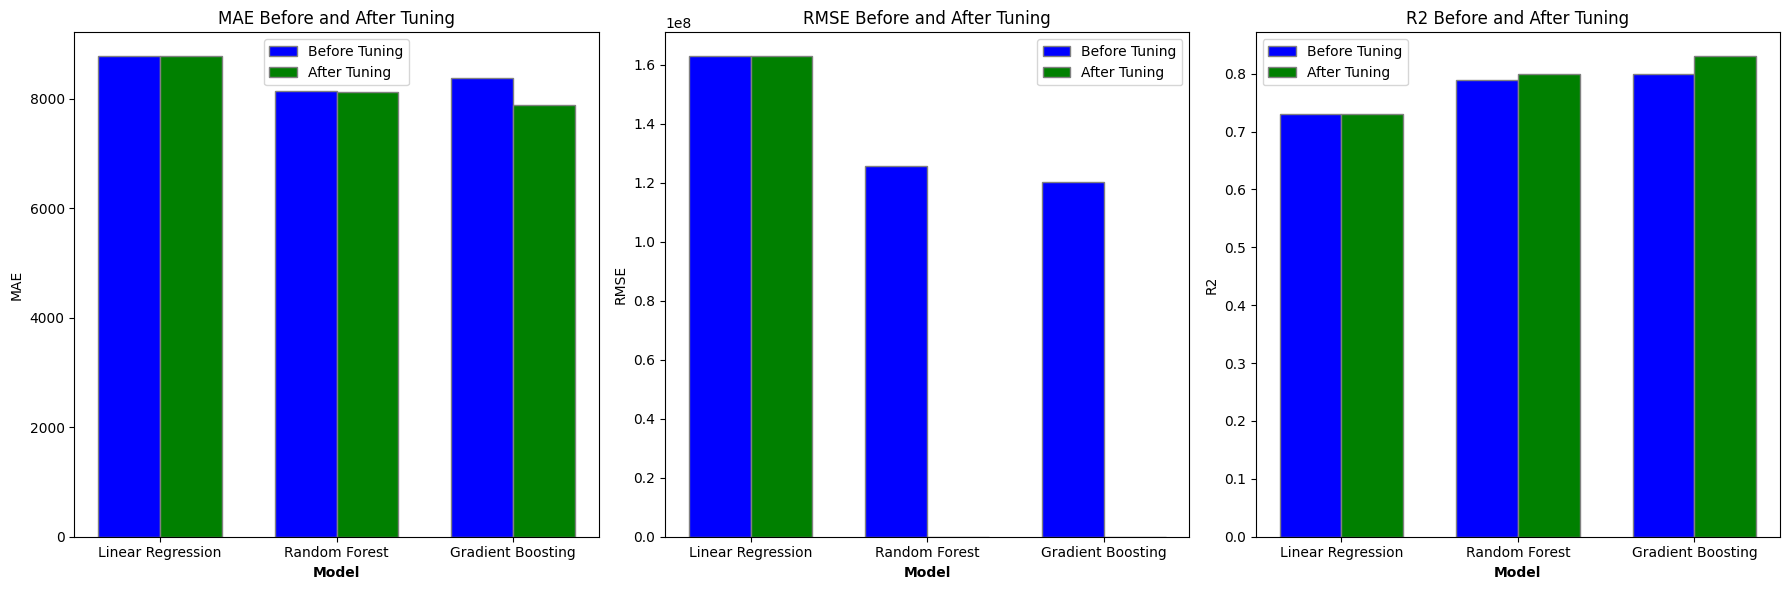

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sample data - replace these with your actual performance metrics
data = {
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting'],
    'MAE_Before_Tuning': [8776.23, 8143.47, 8376.38],
    'MAE_After_Tuning': [8776.23, 8127.68, 7883.03],
    'RMSE_Before_Tuning': [162804248.00, 125480808.74, 120069799.67],
    'RMSE_After_Tuning': [162804248.00, 11128.25, 10259.93],
    'R2_Before_Tuning': [0.73, 0.79, 0.80],
    'R2_After_Tuning': [0.73, 0.80, 0.83]
}
df = pd.DataFrame(data)

# Set the position of the bars on the x-axis
bar_width = 0.35
r1 = np.arange(len(df['Model']))
r2 = [x + bar_width for x in r1]

# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Plotting MAE
ax1.bar(r1, df['MAE_Before_Tuning'], color='blue', width=bar_width, edgecolor='grey', label='Before Tuning')
ax1.bar(r2, df['MAE_After_Tuning'], color='green', width=bar_width, edgecolor='grey', label='After Tuning')
ax1.set_xlabel('Model', fontweight='bold')
ax1.set_ylabel('MAE')
ax1.set_title('MAE Before and After Tuning')
ax1.set_xticks([r + bar_width/2 for r in range(len(df['Model']))])
ax1.set_xticklabels(df['Model'])
ax1.legend()

# Plotting RMSE
ax2.bar(r1, df['RMSE_Before_Tuning'], color='blue', width=bar_width, edgecolor='grey', label='Before Tuning')
ax2.bar(r2, df['RMSE_After_Tuning'], color='green', width=bar_width, edgecolor='grey', label='After Tuning')
ax2.set_xlabel('Model', fontweight='bold')
ax2.set_ylabel('RMSE')
ax2.set_title('RMSE Before and After Tuning')
ax2.set_xticks([r + bar_width/2 for r in range(len(df['Model']))])
ax2.set_xticklabels(df['Model'])
ax2.legend()

# Plotting R2
ax3.bar(r1, df['R2_Before_Tuning'], color='blue', width=bar_width, edgecolor='grey', label='Before Tuning')
ax3.bar(r2, df['R2_After_Tuning'], color='green', width=bar_width, edgecolor='grey', label='After Tuning')
ax3.set_xlabel('Model', fontweight='bold')
ax3.set_ylabel('R2')
ax3.set_title('R2 Before and After Tuning')
ax3.set_xticks([r + bar_width/2 for r in range(len(df['Model']))])
ax3.set_xticklabels(df['Model'])
ax3.legend()

plt.tight_layout()
plt.show()
